In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-13 23:30:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.06s   

2025-10-13 23:30:14 (1.27 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

df = pd.read_csv("course_lead_scoring.csv")


In [2]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [4]:
missing_info = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Missing (%)": round(df.isnull().mean() * 100, 2),
    "Data Type": df.dtypes
})

# 按缺失值數量排序
missing_info = missing_info.sort_values(by="Missing Values", ascending=False)
print(missing_info)

                          Missing Values  Missing (%) Data Type
annual_income                        181        12.38   float64
industry                             134         9.17    object
lead_source                          128         8.76    object
employment_status                    100         6.84    object
location                              63         4.31    object
number_of_courses_viewed               0         0.00     int64
interaction_count                      0         0.00     int64
lead_score                             0         0.00   float64
converted                              0         0.00     int64


In [5]:

# 處理缺值（分類填 'NA'）
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('NA')
    else:
        df[col] = df[col].fillna(0.0)



In [6]:
missing_info = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Missing (%)": round(df.isnull().mean() * 100, 2),
    "Data Type": df.dtypes
})

# 按缺失值數量排序
missing_info = missing_info.sort_values(by="Missing Values", ascending=False)
print(missing_info)

                          Missing Values  Missing (%) Data Type
lead_source                            0          0.0    object
industry                               0          0.0    object
number_of_courses_viewed               0          0.0     int64
annual_income                          0          0.0   float64
employment_status                      0          0.0    object
location                               0          0.0    object
interaction_count                      0          0.0     int64
lead_score                             0          0.0   float64
converted                              0          0.0     int64


In [7]:
# 取眾數
mode_industry = df['industry'].mode()[0]
print("Q1 mode of industry:", mode_industry)


Q1 mode of industry: retail


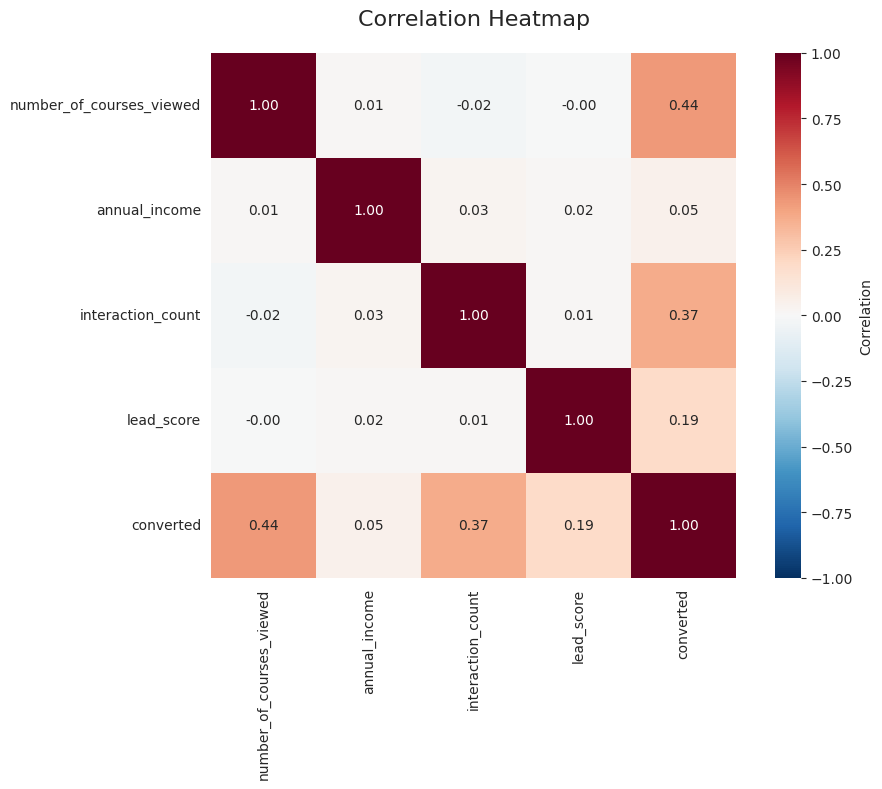

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numerical_features].corr(method="pearson")

sns.set_style("white")  # 設定背景風格
heatmap = sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",                  # 保留小數點兩位
    cmap="RdBu_r",               # 反轉 RdBu 色系，紅正藍負
    cbar_kws={"label": "Correlation"},  # 顯示顏色條標籤
    square=True                  # 方形格子
)

heatmap.set_title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
# 先拆 test (20%) 與 full_train (80%)
full_train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 再從 full_train 拆出 train (60%) 與 val (20%) → 相當於 test_size=0.25
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)


print("train/val/test sizes:", train_df.shape[0], val_df.shape[0], test_df.shape[0])



train/val/test sizes: 876 293 293


In [10]:
target = "converted"
categorical_features = df.select_dtypes(include="object").columns.tolist()

features = numerical_features + categorical_features
features.remove(target)

# Training set
X_train = train_df[features].reset_index(drop=True)
y_train = train_df[target].reset_index(drop=True)

# Validation set
X_val = val_df[features].reset_index(drop=True)
y_val = val_df[target].reset_index(drop=True)

# Test set
X_test = test_df[features].reset_index(drop=True)
y_test = test_df[target].reset_index(drop=True)

In [11]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
X_train_cat = X_train[cat_cols].apply(lambda col: col.astype('category').cat.codes)

mi = mutual_info_classif(X_train_cat, y_train, discrete_features=True, random_state=42)
mi_series = pd.Series(mi, index=cat_cols).sort_values(ascending=False)
print(mi_series.round(5))
print("Q3 best:", mi_series.idxmax())


lead_source          0.03540
employment_status    0.01294
industry             0.01157
location             0.00446
dtype: float64
Q3 best: lead_source


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer


# One-hot encoding
dv = DictVectorizer(sparse=False)

x_train = dv.fit_transform(X_train.to_dict(orient="records"))
x_val = dv.transform(X_val.to_dict(orient="records"))
x_test = dv.transform(X_test.to_dict(orient="records"))


# Logistic Regression
# 建立並訓練模型
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(x_train, y_train)

# 驗證準確率
y_pred = model.predict(x_val)
acc_val = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", round(acc_val, 2))


Validation Accuracy: 0.7


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# base model accuracy (不重訓 ohe 的情況下，我們用上面 Q4 的 acc_val 作為 base_acc)
base_acc = accuracy_score(y_val, model.predict(x_val))  # 用原模型（C=1）的實際 acc (未 round)
results = []


for feat in X_train.columns:
    # 刪掉該特徵
    X_tr_red = X_train.drop(columns=[feat])
    X_v_red = X_val.drop(columns=[feat])
    
    # 使用 DictVectorizer 做 one-hot encoding
    dv = DictVectorizer(sparse=False)
    
    X_tr_p = dv.fit_transform(X_tr_red.to_dict(orient='records'))
    X_v_p = dv.transform(X_v_red.to_dict(orient='records'))
    

    # 訓練模型
    mdl = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    mdl.fit(X_tr_p, y_train)

    # 計算驗證集 accuracy
    acc_r = accuracy_score(y_val, mdl.predict(X_v_p))
    abs_diff = abs(base_acc - acc_r)
    results.append((feat, acc_r, abs_diff))
    

# 輸出整齊對齊格式
for feat, acc_r, abs_diff in sorted(results, key=lambda x: x[2]):
    print(f"Model without {feat:<30}| Accuracy = {acc_r:.4f}| Absolute Difference = {abs_diff:.4f}")



Model without industry                      | Accuracy = 0.6997| Absolute Difference = 0.0000
Model without employment_status             | Accuracy = 0.6962| Absolute Difference = 0.0034
Model without lead_source                   | Accuracy = 0.7031| Absolute Difference = 0.0034
Model without lead_score                    | Accuracy = 0.7065| Absolute Difference = 0.0068
Model without location                      | Accuracy = 0.7099| Absolute Difference = 0.0102
Model without number_of_courses_viewed      | Accuracy = 0.5563| Absolute Difference = 0.1433
Model without interaction_count             | Accuracy = 0.5563| Absolute Difference = 0.1433
Model without annual_income                 | Accuracy = 0.8532| Absolute Difference = 0.1536


In [14]:
Cs = [0.01, 0.1, 1, 10, 100]
results = {}

for C in Cs:
    mdl = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    x_train = dv.fit_transform(X_train.to_dict(orient="records"))
    x_val = dv.transform(X_val.to_dict(orient="records"))


    mdl.fit(x_train, y_train)
    
    acc_C = round(accuracy_score(y_val, mdl.predict(x_val)), 3)
    results[C] = acc_C

print("Validation accuracies by C:", results)
# 選最大準確率，若有多個選最小 C
bestC = sorted(results.items(), key=lambda x:(-x[1], x[0]))[0][0]
print("Q6 best C:", bestC)


Validation accuracies by C: {0.01: 0.7, 0.1: 0.7, 1: 0.7, 10: 0.7, 100: 0.7}
Q6 best C: 0.01
